In [14]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
df['Age'].isnull().sum()

177

In [6]:
df['Age'].dropna().sample()

299    50.0
Name: Age, dtype: float64

In [7]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [13]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [9]:
median=df.Age.median()
median

28.0

In [10]:
impute_nan(df,'Age',median)

In [11]:
df.head(6)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0


In [29]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [23]:
x=df['Age']
y=df['Age_random']

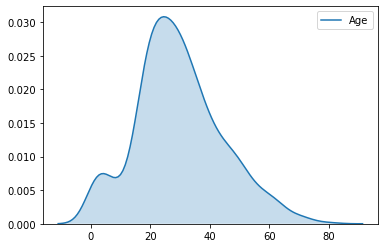

In [24]:
sns.kdeplot(x,shade=True)

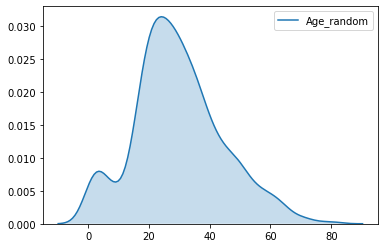

In [28]:
sns.kdeplot(y,shade=True)